# Travail Pratique 4 - Segmentation des clients de carte de crédit

L'objectif est de modéliser les categories de clients de carte de crédit pour aider l'équipe de marketing a proposer des produits mieux adaptés aux nouveaux clients. Pour cela nous allons d'abord utiliser la methode PCA pour reduire la dimension des donnees de 17 a 6 avant d'appliquer l'algorithme de clustering KMeans pour determiner les differents categories(clusters) de clients. Ensuite, nous allons reduire a nouveau la dimension en projectant les donnees sur 2 dimensions pour une meilleure visualisation sur un diagramme 2D.

Dans ce TP, nous allons apprendre:

- Gerer valeurs manquantes
- L'analyse exploratoire des données
- Réduction de la dimensionnalité d'un probleme
- Clustering avec KMeans

In [51]:
# Importer les librairies neccessaires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Lecture les données

Telecharger le fichier de données a partir de https://github.com/cwette/ml_udschang/blob/main/creditcardsdata.csv et placer dans le meme repertoire que ce notebooks

In [52]:
# Creer la dataframe
df= pd.read_csv('creditcarddata.csv')
df.head()

### **Descriptions des attributs**

- CUSTID : Identification du titulaire de la carte de crédit
- BALANCE : Montant du solde laissé sur le compte du client pour effectuer des achats
- BALANCE_FREQUENCY : fréquence à laquelle le solde est mis à jour (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)
- PURCHASES : Montant des achats effectués depuis le compte
- ONEOFFPURCHASES : Montant maximum d'achat effectué en une seule fois
- INSTALLMENTS_PURCHASES : Montant de l'achat effectué en plusieurs fois
- CASH_ADVANCE : Paiement d'avance remis par l'utilisateur
- PURCHASES_FREQUENCY : fréquence à laquelle les achats sont effectués, score compris entre 0 et 1 (1 = achats fréquents, 0 = achats peu fréquents)
- ONEOFF_PURCHASES_FREQUENCY : Fréquence des achats en une seule fois (1 = achats fréquents, 0 = achats peu fréquents)
- PURCHASES_INSTALLMENTS_FREQUENCY : fréquence à laquelle les achats en plusieurs fois sont effectués (1 = faits fréquemment, 0 = pas souvent)
- CASH_ADVANCE_FREQUENCY : à quelle fréquence l'avance en espèces est-elle payée
- CASH_ADVANCE_TRX : Nombre de Transactions effectuées avec "Cash in Advance"
- PURCHASES_TRX : nombre de transactions d'achat effectuées
- CREDIT_LIMIT : Limite de carte de crédit pour l'utilisateur
- PAYMENTS : Montant du paiement effectué par l'utilisateur
- MINIMUM_PAYMENTS : montant minimum des paiements effectués par l'utilisateur
- PRC_FULL_PAYMENT : pourcentage du paiement intégral payé par l'utilisateur
- TENURE : Durée du service de carte de crédit pour l'utilisateur

In [53]:
# Afficher la dimension de la dataframe
....

In [54]:
# Afficher le type des attributs
df.info()

In [25]:
# Exclure les attributes non utiles comme CUST_ID
df.drop(...)

### **Verifier les valeurs manquantes**

In [55]:
# Identifier les valeurs manquantes par attributs
df.isna().sum()

In [28]:
# Utiliser la methode dropna() pour supprimer les rangees dont la valeur de l'attribut CREDIT_LIMIT est manquante
df.dropna(...,...)

In [29]:
df.isna().sum()

In [30]:
df.info()

In [31]:
# Calculer la valeur mediane de l'attribut MINIMUM_PAYMENTS
# Puis Utiliser la methode fillna() pour remplacer les valeurs manquantes de l'attribut MINIMUM_PAYMENTS avec la valeur mediane
df[...].fillna(df[...].median(), inplace=True)

In [56]:
# Utiliser a nouveau isna() pour verifier qu'il n y a plus de valeurs manquantes 
...

## **Exploration des donnees**

In [57]:
# Afficher la distribution de la BALANCE
plt.figure(figsize= (20,40))       
sns.distplot(df['BALANCE'])
plt.show()

In [ ]:
# creer la liste des colonnes
columns = df.columns

In [59]:
# Faire une boucle sur la liste des colonnes pour afficher une distribution de chacun des attributs
i=1
plt.figure(figsize= (20,40))
for col in ...:
    plt.subplot(9,2,i)        
    sns.distplot(...)  
    i=i+1
plt.show()

In [60]:
# Verifier le niveau d'asymétrie de ces distributions
for col in df.columns:
    print(col)
    print({df[col].skew()})

**Il semble que nos données sont assez asymétriques**

Pour traiter cette asymétrie, nous allons les transformer les colonnes avec la méthode de la racine carrée

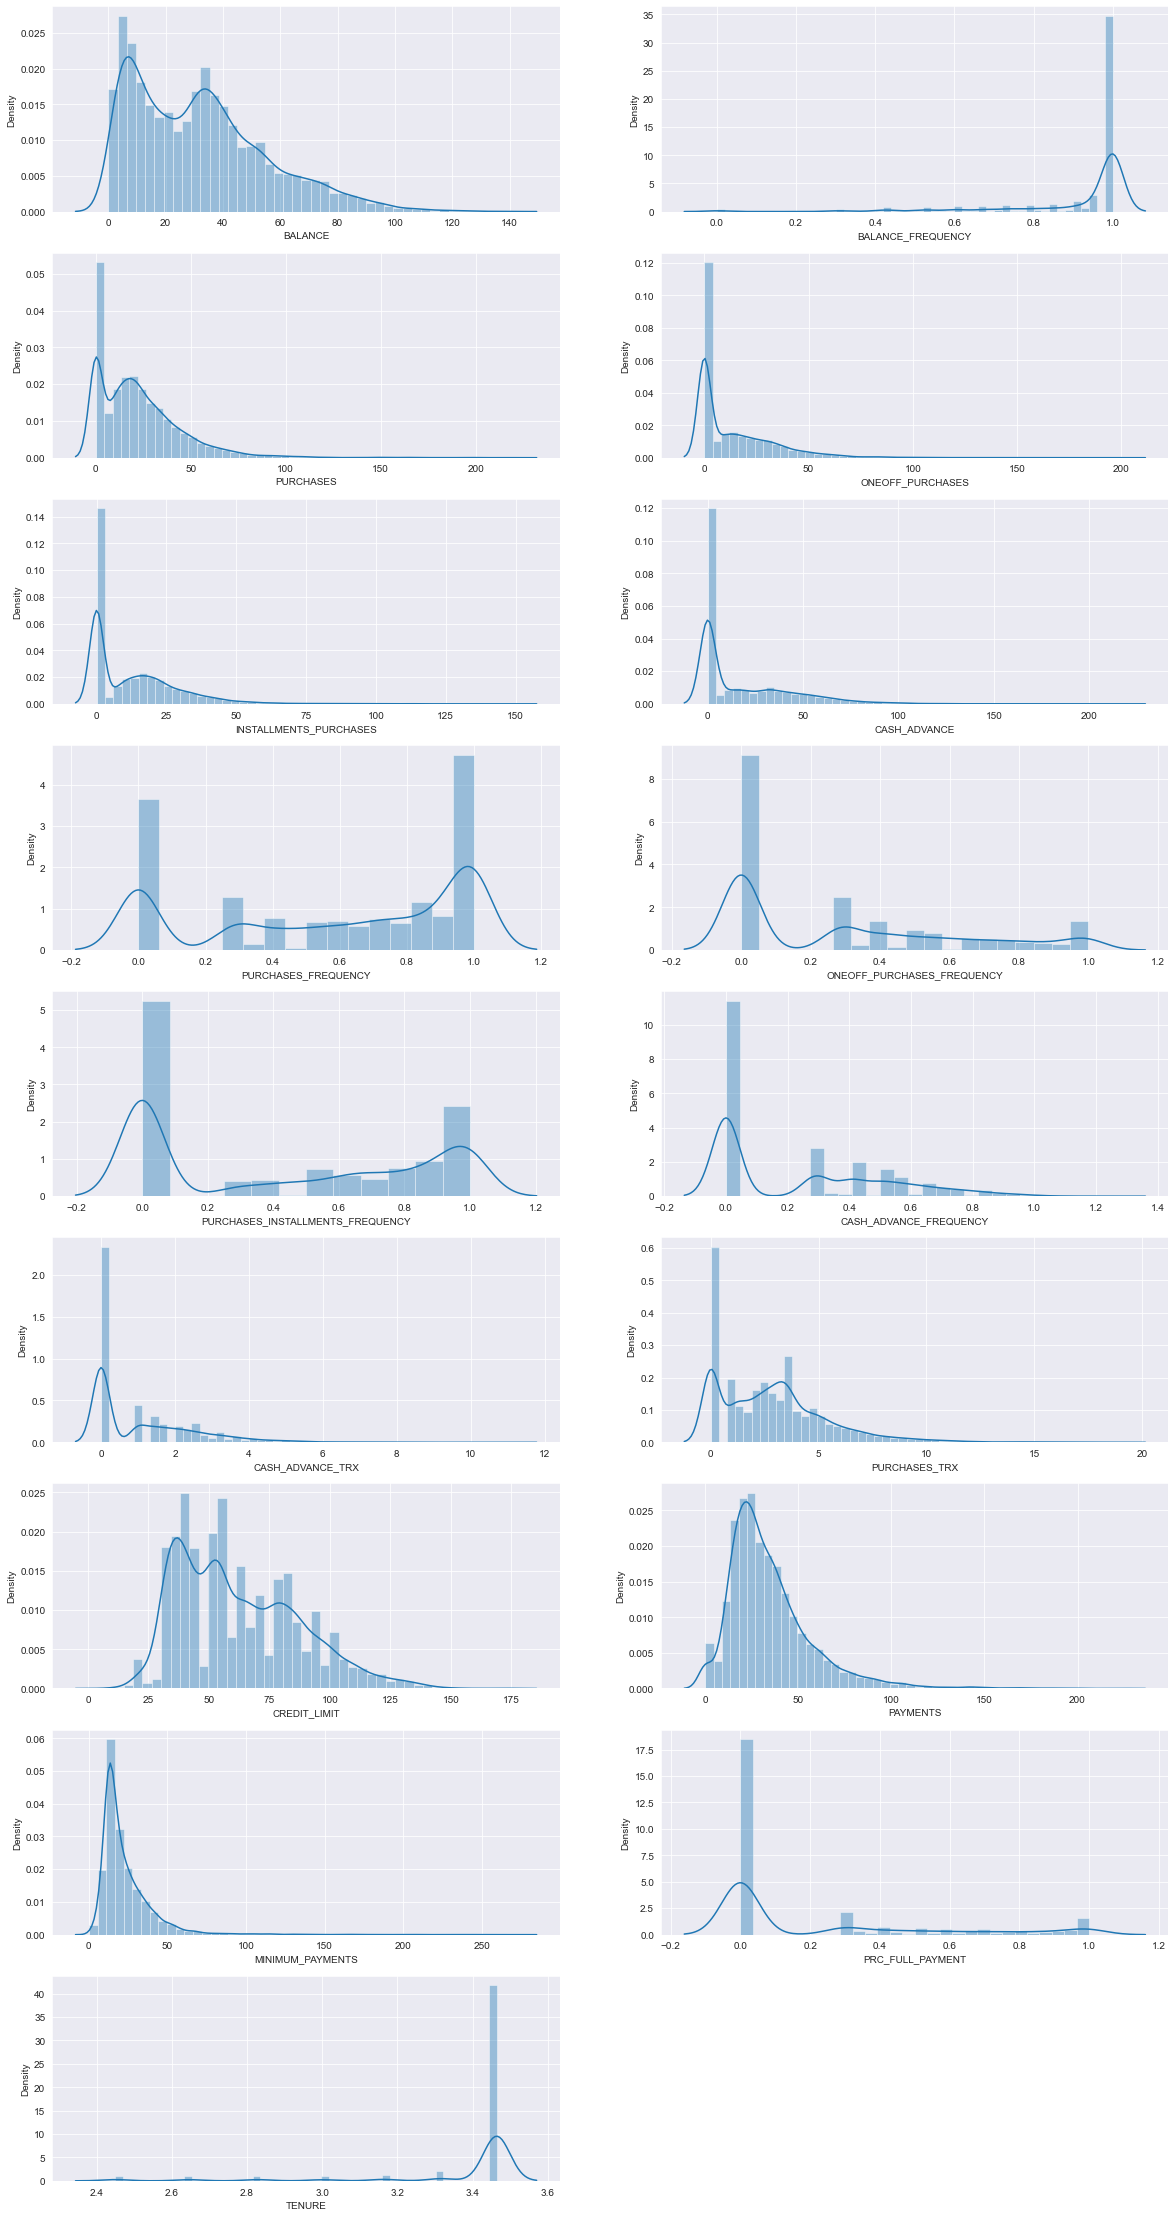

In [38]:
i=1
plt.figure(figsize=(20,40))
for col in ...:
    plt.subplot(9,2,i)
    df[col]= np.sqrt(df[col])
    sns.distplot(...)
    i=i+1
    
plt.show()

**Il y a toujours de l'asymétrie, mais c'est mieux qu'avant**

**Afficher le diagramme heatmap() pour voir s'il y a corrélation entre les attributs**

<AxesSubplot:>

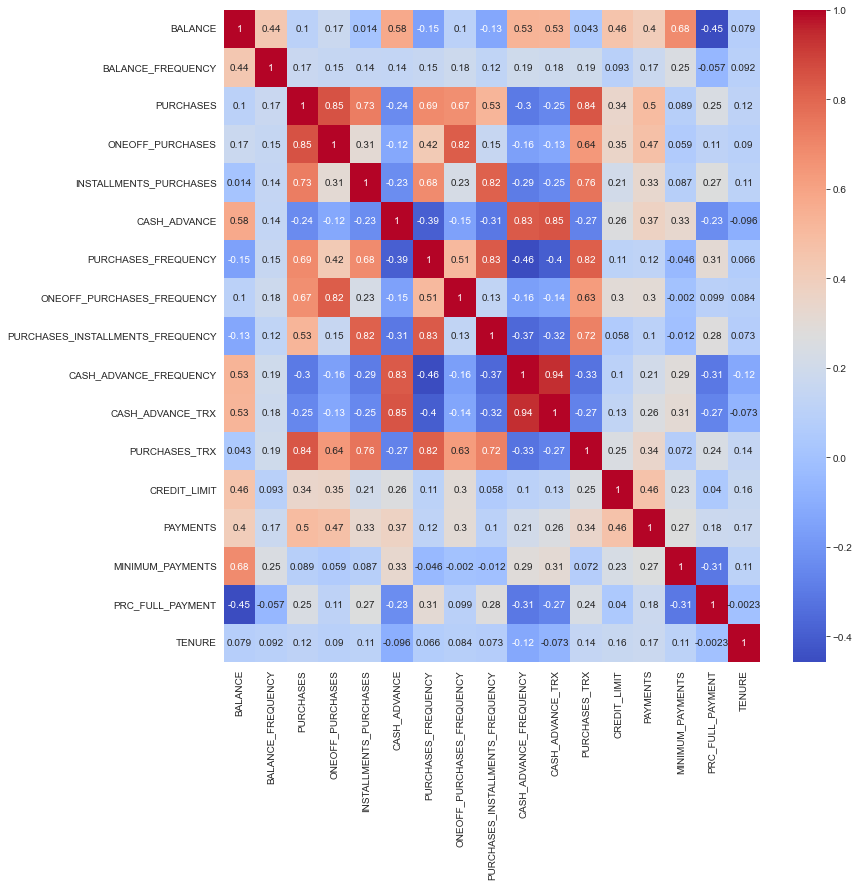

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Reduction de Dimensionalité - PCA

Il y a plusieurs attributs correlés.
Nous allons reduire la dimensionnalité avec Principal Component Analysis (PCA)

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisation les donnees
ss= StandardScaler()
df= ss.fit_transform(df)

# Declarer PCA. Quand le nombre de composants n_components n'est pas défini, PCA retoune tous les composants 
pca= PCA()
# Appliquer PCA sur nos donnees
pca.fit(df)

PCA()

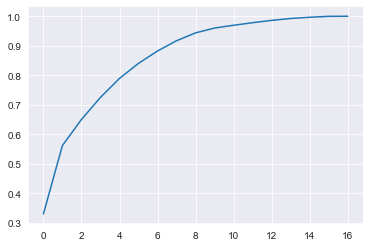

In [41]:
# Determinons le nombre de composantes(dimensions) optimal pour representer nos donnees dans une dimension plus reduite
# Nous allons d'abord afficher le pourcentage de variance expliqué par chacune des composantes sélectionnées.
# Pour plus de details sur PCA, https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
plt.plot(pca.explained_variance_ratio_.cumsum())

In [19]:
# sur le diagrame precedent, on constate que 6 composantes est suffisant pour representer jusqu'a 90% de variance
# Redeclarer PCA en limitant le nombre de composants retournes. 
# Ceci va nous permettre de reduire notre ensemble de donnees de 17 dimensions a 6 dimensions
pca= ...

# Appliquer la transformation sur nos donnees
X= pca.fit_transform(...)

In [44]:
pca= PCA(n_components=6)
X= pca.fit_transform(df)

# KMeans Clustering

Nous allons utiliser KMeans sur l'ensemble de donnees X obtenu apres reduction de la dimension pour determiner les categories existantes dans notre ensemble de donnees

In [62]:
# Importer les librairies neccessaires
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Utilisez la methode Elbow pour determinez le nombre optimal de clusters
inertias=[]
for i in range(2,30):
    kmeans= ...
    kmeans.fit(...)
    inertias.append(kmeans.inertia_)

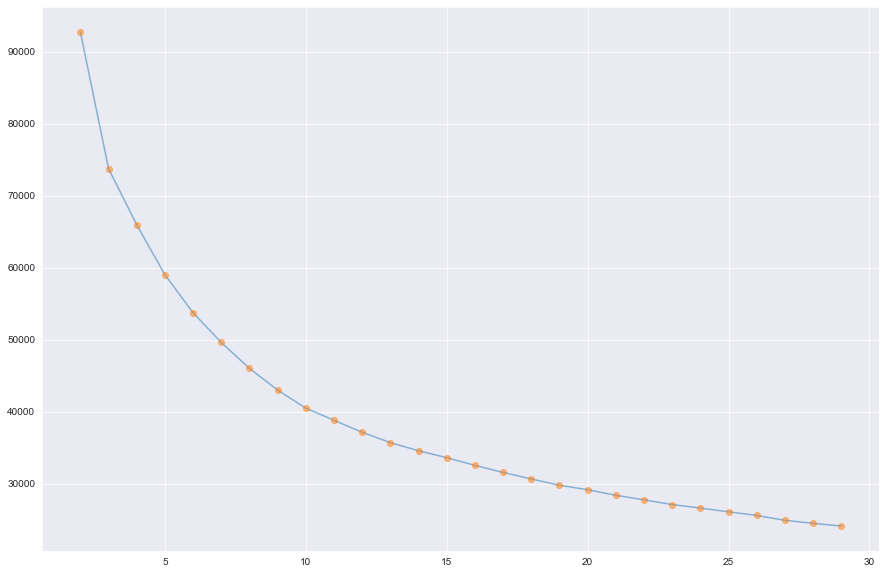

In [46]:
# Afficher le courbe de Elbow
plt.figure(figsize=(15,10))
plt.plot(np.arange(2,30,1), inertias, alpha=0.5)
plt.plot(np.arange(2,30,1), inertias,'o' ,alpha=0.5)
plt.show()

In [ ]:
# Quel est le numbre optimal de clusters pour ce probleme
nb_clusters = ...

In [23]:
# Redeclarez un model KMeans en fixant le nombre de cluster a nb_clusters
kmeans= ...
# Apprentissage
kmeans.fit(...)
# L'ensemble des classes
labels= kmeans.labels_

**Nous allons utiliser à nouveau PCA pour réduire les données à 2 composantes, afin de mieux visualiser nos clusters sur un diagramme a 2 dimensions**

In [25]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df)

In [63]:
pca_df = pd.DataFrame(data=X2, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

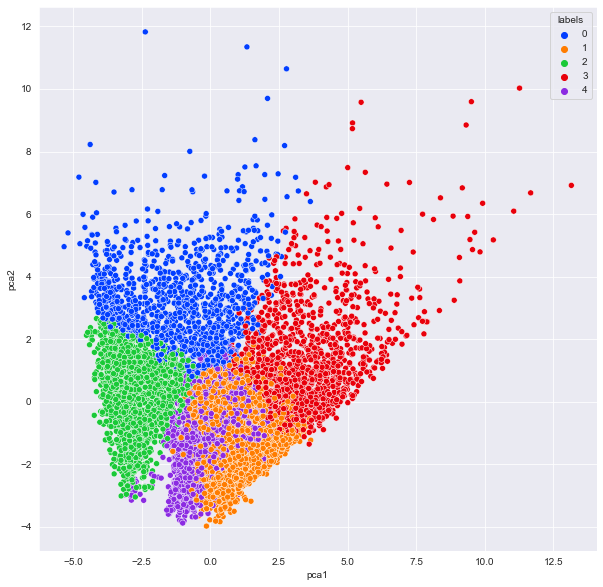

In [27]:
# Visualisation de nos 5 clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')

**Clustering a 3 clusters**

Refaire l'apprentissage d'un nouveau modele KMeans sur l'ensemble de donnees original X en fixant le nombre de clusters a 3 puis visualiser les clusters en dimension reduite X2 sur un diagramme a 2 dimensions

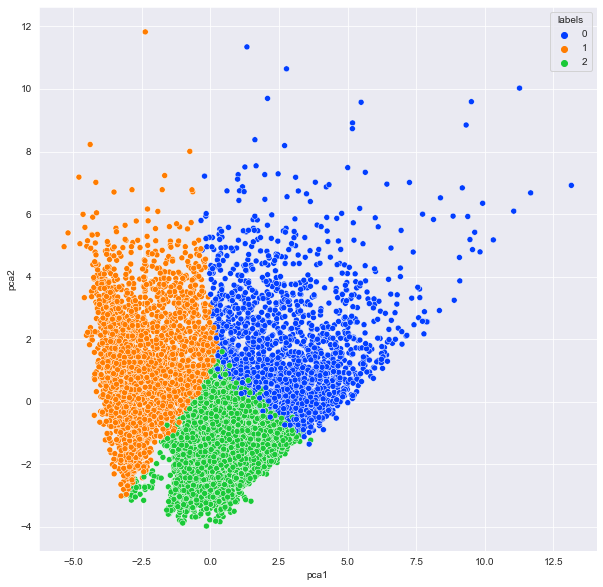

In [31]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')